In [1]:
# Please download the dataset and save it in the 'data' folder.
# The folder structure should be as follows:
# ./data/
# ├── test/
# │   ├── images/  # Test images
# │   │   └── example_image.jpg  # Example Test image
# │   └── labels/  # Test labels
# │       └── example_label.txt
# ├── train/
# │   ├── images/  # Training images
# │   │   └── example_image.jpg  # Example training image
# │   └── labels/  # Training labels
# │       └── example_label.txt  # Example training label -> 0 0.6572081965784873 0.7418986824402122 0.1641185514388546 0.06947686474396152
# └── val/
#     ├── images/  # Validation images
#     │   └── example_image.jpg  # Example validation image
#     └── labels/  # Validation labels
#         └── example_label.txt  # Example validation label -> 0 0.6572081965784873 0.7418986824402122 0.1641185514388546 0.06947686474396152

print('TRaiFIC : ANNPR')


TRaiFIC : ANNPR


In [2]:
# Install necessary libraries
# !pip install ultralytics 
print('installed ultraalytics')
# !pip install split-folders # This library is used to split the dataset into train and validation set if your dataset is not already split.
print('installed split-folders')


installed ultraalytics
installed split-folders


In [2]:
# Import necessary libraries
import os
print('os')
import splitfolders
print('splitfolders')
import yaml
print('yaml')
from ultralytics import YOLO
print('ultralytics')


os
splitfolders
yaml
ultralytics


In [4]:
# Check if the path exists and print the data and appropriate data structure
data_path = os.path.abspath('./data')

if os.path.exists(data_path):
    print("Path exists.")
    print("Contents of data folder:", os.listdir(data_path))
    
    # Check for 'train' and 'val' directories
    train_path = os.path.join(data_path, 'train')
    val_path = os.path.join(data_path, 'val')
    
    if os.path.exists(train_path) and os.listdir(train_path):
        print("'train' directory exists and contains files.")
    else:
        print("'train' directory does not exist or is empty.")
    
    if os.path.exists(val_path) and os.listdir(val_path):
        print("'val' directory exists and contains files.")
    else:
        print("'val' directory does not exist or is empty.")
        
    print("Data path check completed.")
    print("You can now proceed with the data processing.")
else:
    print("Path does not exist.")


Path exists.
Contents of data folder: ['test', 'train', 'valid']
'train' directory exists and contains files.
'val' directory does not exist or is empty.
Data path check completed.
You can now proceed with the data processing.


In [5]:

# Step 2: Update the YAML file with the new paths
yaml_file_path = os.path.abspath('segment_char.yaml')  # Dynamic path resolution

# Ensure directory exists
os.makedirs(os.path.dirname(yaml_file_path), exist_ok=True)

# Create/update YAML content with proper structure
data = {
    'train': os.path.join(data_path, 'train', 'images'),
    'val': os.path.join(data_path, 'valid', 'images'),
    'test': os.path.join(data_path, 'test', 'images'),
    'nc': 1,  
    'names': ['character']
}

# Write the updated YAML file
with open(yaml_file_path, 'w') as f:
    yaml.safe_dump(data, f, default_flow_style=None)

print(f"YAML file updated: {yaml_file_path}")
print("YAML content:")
print(yaml.dump(data, default_flow_style=None))






YAML file updated: F:\development\python\ANPR\models\sg-traific\segment_char.yaml
YAML content:
names: [character]
nc: 1
test: F:\development\python\ANPR\models\sg-traific\data\test\images
train: F:\development\python\ANPR\models\sg-traific\data\train\images
val: F:\development\python\ANPR\models\sg-traific\data\valid\images



In [22]:
# check for gpu avaiable if CUDA avaiable : false then may need to upgrade the pytorch
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU name: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "No GPU detected")

PyTorch version: 2.7.0+cu118
CUDA available: True
GPU name: GeForce GTX 1650


In [6]:
 
# Get the absolute path of the YAML file
yaml_path = os.path.abspath('segment_char.yaml')
print(yaml_path)  # Print the path to verify its location

# Open and read the YAML file to verify its content
print("\nVerify YAML content:\n")
with open(yaml_path, 'r') as f:
    print(f.read())  # Print the content of the YAML file
    # check for path exists and print the data and appropriate data structure
    data_path = os.path.abspath('./data')
    if os.path.exists(data_path):
        print("Path exists.")
        print("Contents of data folder:", os.listdir(data_path))
        
        # Check for 'train' and 'val' directories
        train_path = os.path.join(data_path, 'train')
        val_path = os.path.join(data_path, 'valid')
        test_path = os.path.join(data_path, 'test')
        
        if os.path.exists(train_path) and os.listdir(train_path):
            print("'train' directory exists and contains files.")
        else:
            print("'train' directory does not exist or is empty.")
        
        if os.path.exists(val_path) and os.listdir(val_path):
            print("'val' directory exists and contains files.")
        else:
            print("'val' directory does not exist or is empty.")
        if os.path.exists(test_path) and os.listdir(test_path):
            print("'test' directory exists and contains files.")
        else:
            print("'test' directory does not exist or is empty.")
            
        print("Data path check completed.")
        print("You can now proceed with the data processing.")
    else:
        print("Path does not exist.")

F:\development\python\ANPR\models\sg-traific\segment_char.yaml

Verify YAML content:

names: [character]
nc: 1
test: F:\development\python\ANPR\models\sg-traific\data\test\images
train: F:\development\python\ANPR\models\sg-traific\data\train\images
val: F:\development\python\ANPR\models\sg-traific\data\valid\images

Path exists.
Contents of data folder: ['test', 'train', 'valid']
'train' directory exists and contains files.
'val' directory exists and contains files.
'test' directory exists and contains files.
Data path check completed.
You can now proceed with the data processing.


In [ ]:
# !yolo task=detect mode=train model=yolov8n.pt data=face.yaml epochs=5 imgsz=320 batch=4 device=0
# path_project =os.path.abspath('training_results')
# !yolo task=detect mode=train model=yolov8n.pt data=face.yaml epochs=20 imgsz=640 batch=4 device=0 cache=True project=path_project name='segmentation_yolov8_4_14_25_4_49'

# !yolo task=detect mode=train model=yolov8n.pt data=face.yaml epochs=20 imgsz=320 batch=4 project="F:/development/python/Number-Plate-Detection/custom_runs" name="experiment1"

In [7]:
# from ultralytics import YOLO

model = YOLO("yolov8n.pt")




results = model.train(
    model='yolov8n.pt',
    data=yaml_path,
    imgsz=640,
    epochs=5,
    batch=4,
    device='0', # for device with gpu avaiable otherwise remove this

    project=os.path.abspath('training_results'),
    name='traific_sg_beta_v1',
    cache=True
)
metrics = model.val()
print(metrics)

New https://pypi.org/project/ultralytics/8.3.121 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.116  Python-3.10.17 torch-2.7.0+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=F:\development\python\ANPR\models\sg-traific\segment_char.yaml, epochs=5, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=F:\development\python\ANPR\models\sg-traific\training_results, name=traific_sg_beta_v1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

train: Scanning F:\development\python\ANPR\models\sg-traific\data\train\labels.

WARNING train: 1.5GB RAM required to cache images with 50% safety margin but only 1.1/7.8GB available, not caching images


val: Fast image access  (ping: 0.30.1 ms, read: 16.79.8 MB/s, size: 9.1 KB)


val: Scanning F:\development\python\ANPR\models\sg-traific\data\valid\labels.ca

WARNING val: 0.3GB RAM required to cache images with 50% safety margin but only 0.2/7.8GB available, not caching images


Plotting labels to F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.01G      1.055      1.026       1.07         49        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all        375       2876      0.956      0.962      0.983      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.26G     0.9074     0.6267       1.01         56        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all        375       2876       0.96       0.97       0.99      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.28G     0.8599     0.5526     0.9987         75        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all        375       2876      0.978      0.961      0.991      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       1.3G     0.8073     0.4877     0.9811         90        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all        375       2876      0.974      0.971      0.991      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.32G     0.7628     0.4449      0.966         55        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all        375       2876      0.982      0.976      0.993      0.821



5 epochs completed in 0.098 hours.
Optimizer stripped from F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\weights\last.pt, 6.2MB
Optimizer stripped from F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\weights\best.pt, 6.2MB

Validating F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\weights\best.pt...
Ultralytics 8.3.116  Python-3.10.17 torch-2.7.0+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  


                   all        375       2876      0.982      0.976      0.993      0.821
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1
Ultralytics 8.3.116  Python-3.10.17 torch-2.7.0+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 67.236.2 MB/s, size: 10.3 KB)


val: Scanning F:\development\python\ANPR\models\sg-traific\data\valid\labels.ca

WARNING cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.2GB RAM): 100%|██████████| 375/375 [00:00<00:00, 2467.30
                 Class     Images  Instances      Box(P          R      mAP50  


                   all        375       2876      0.982      0.976      0.993      0.821
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v12
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F7B01D9600>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.0

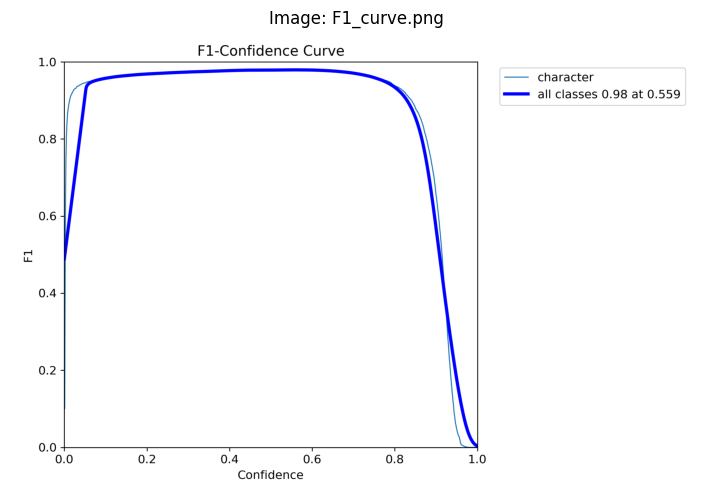

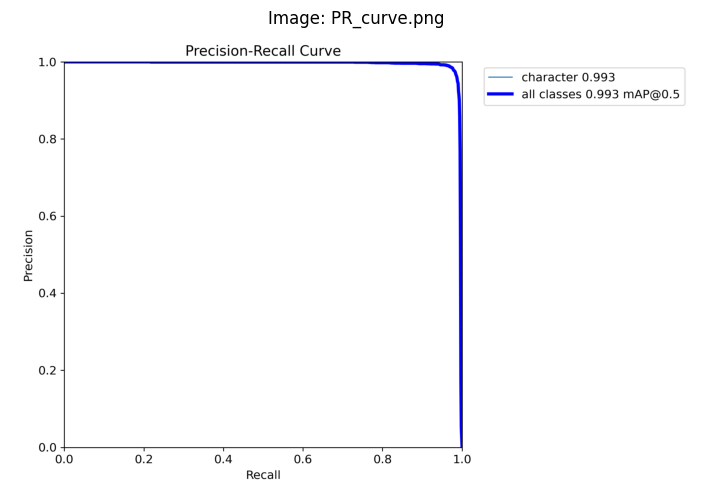

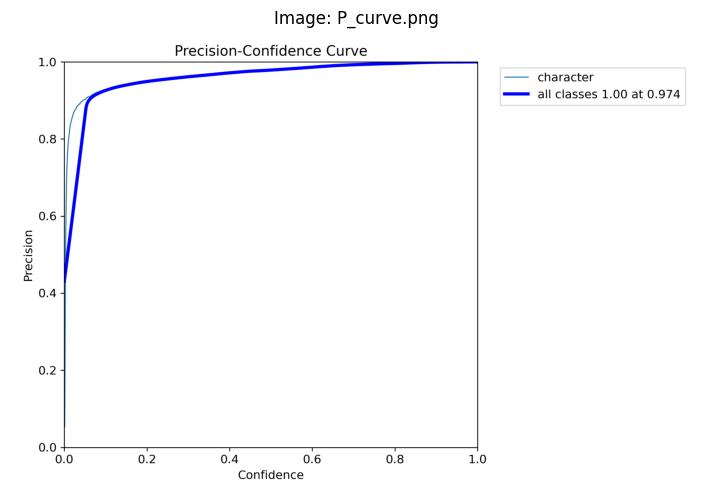

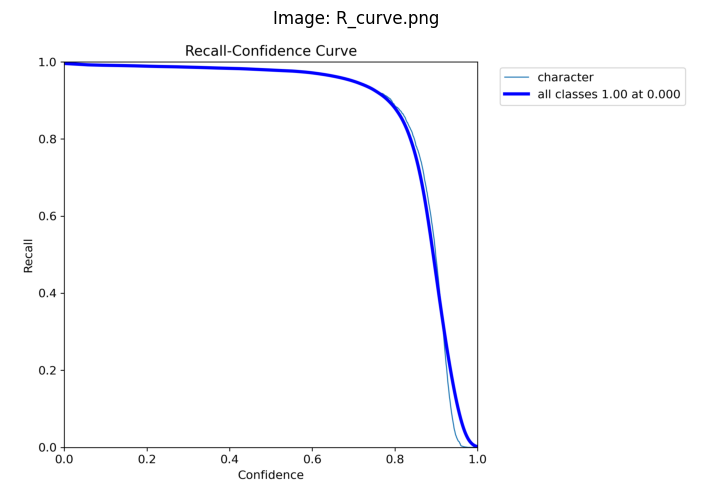

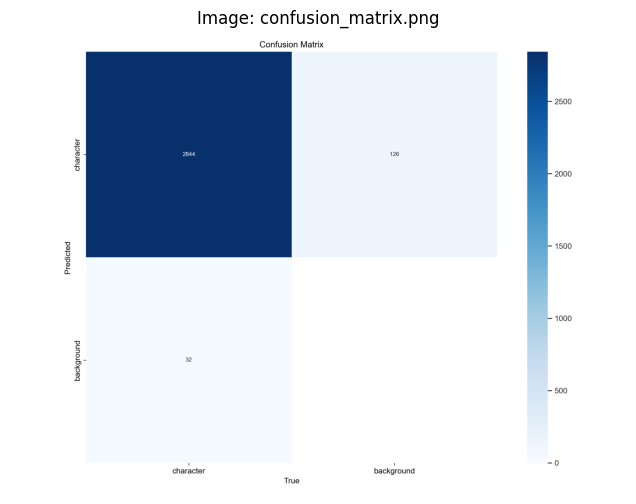

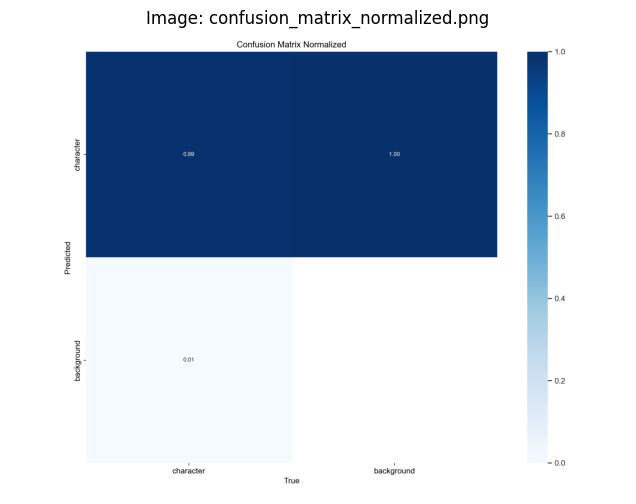

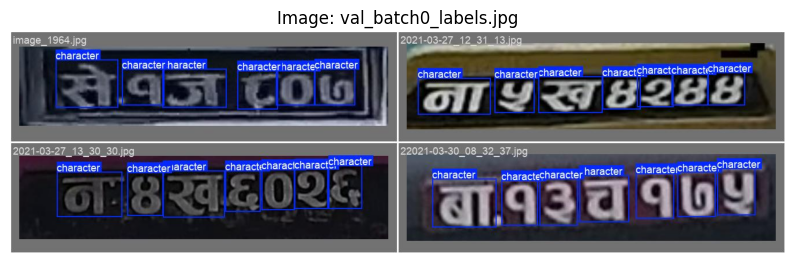

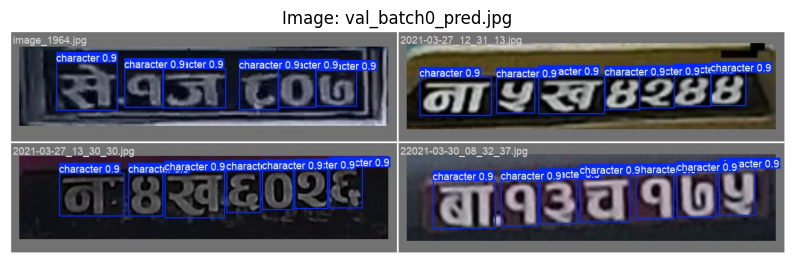

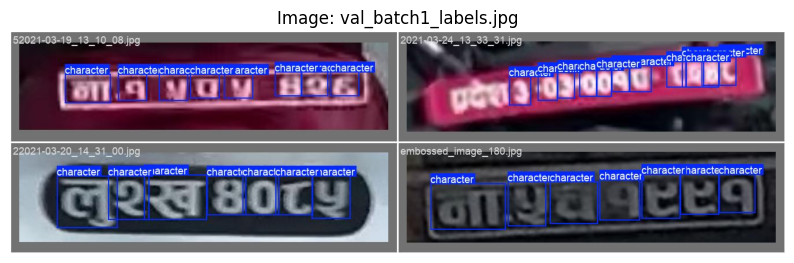

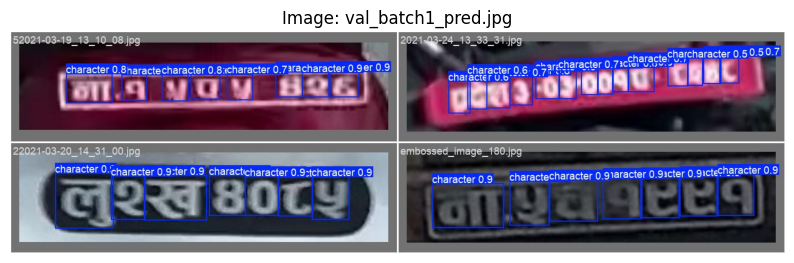

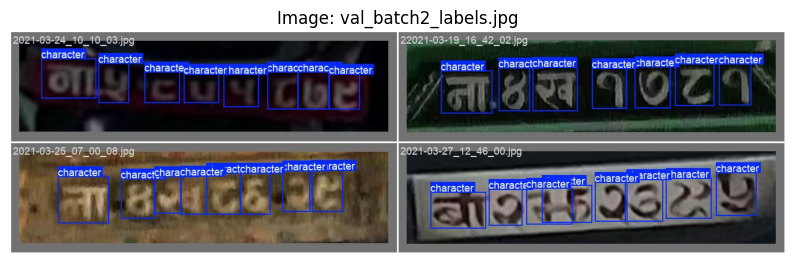

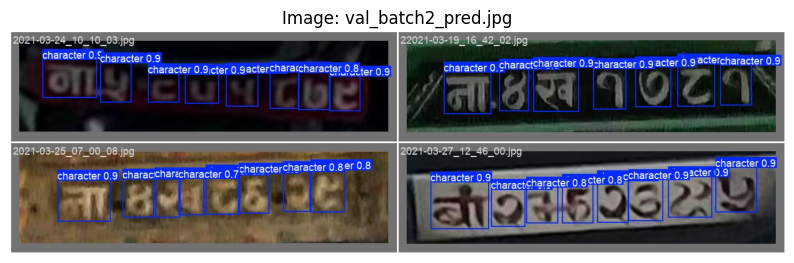

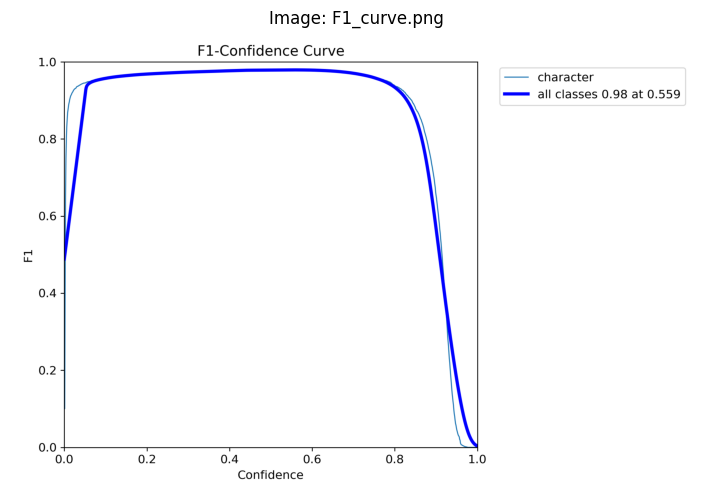

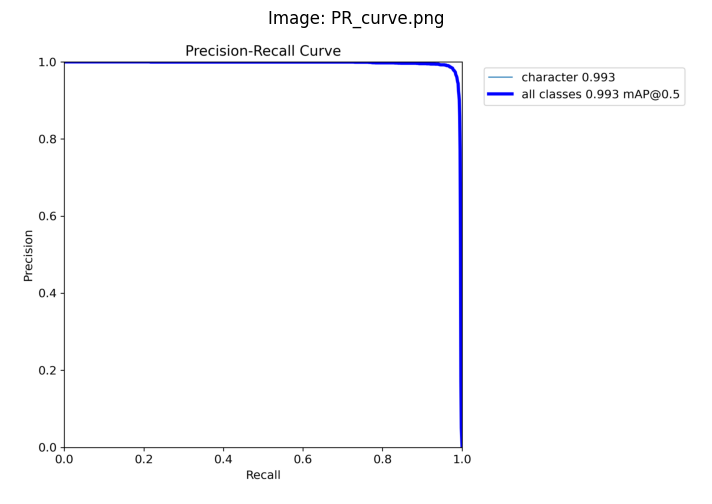

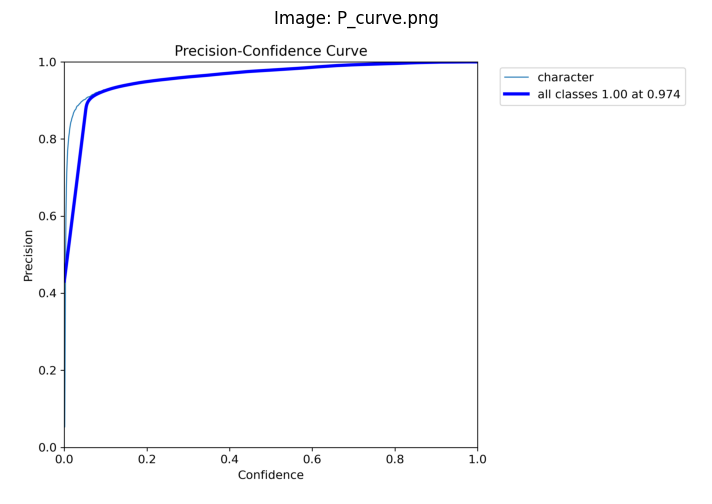

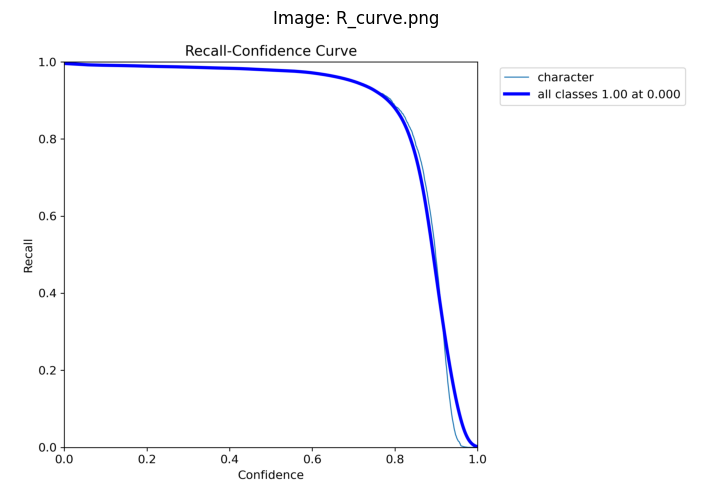

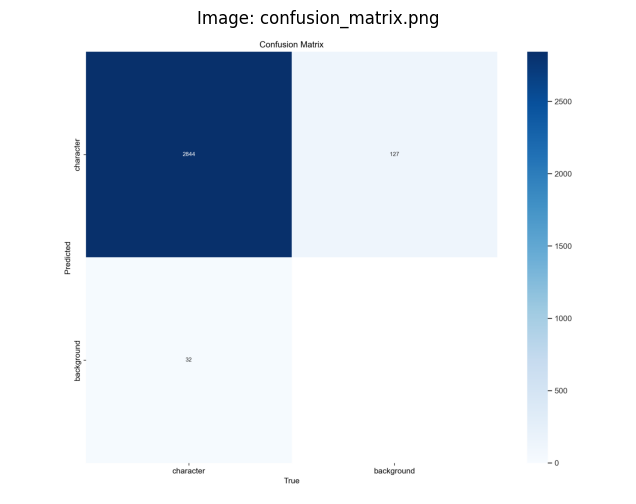

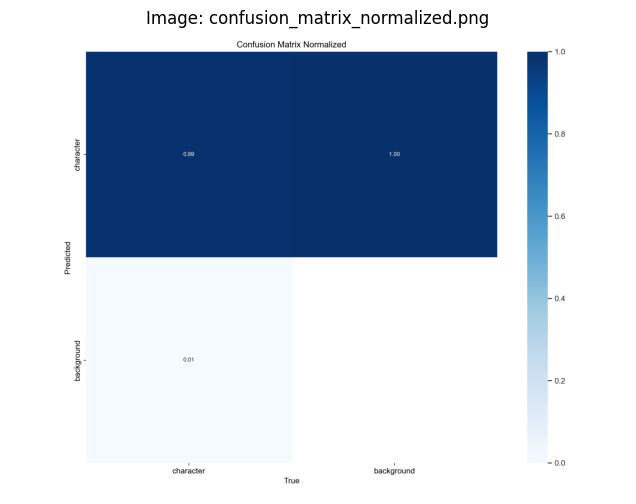

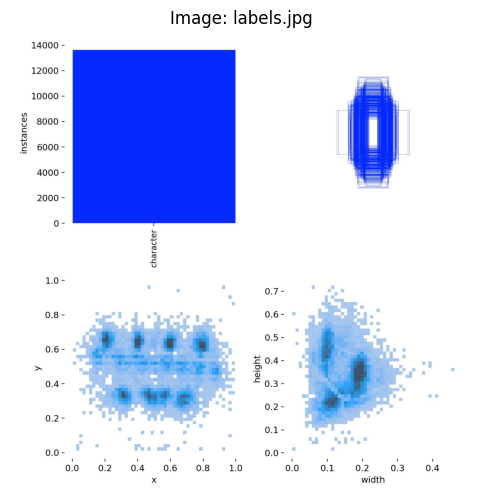

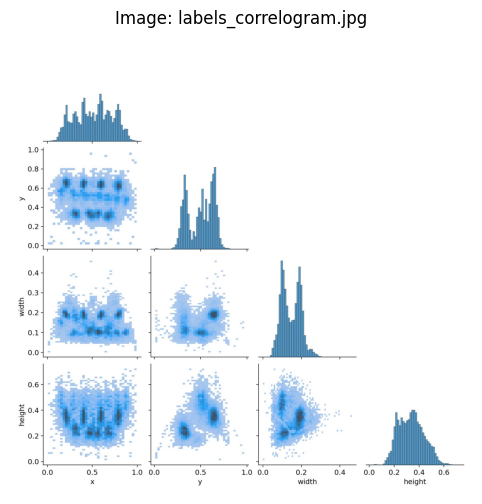

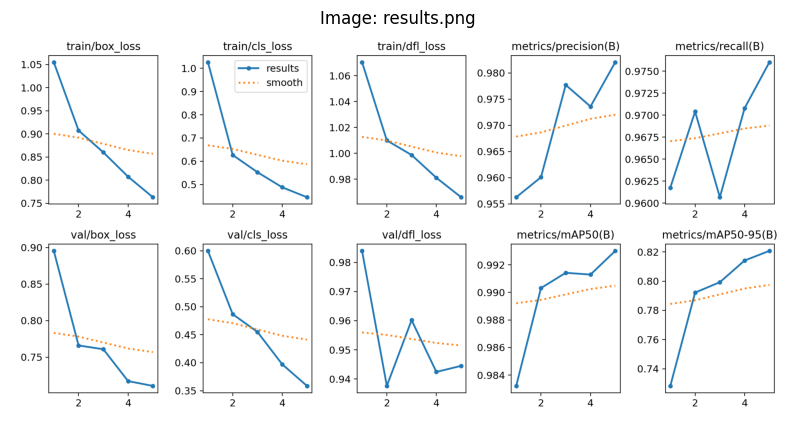

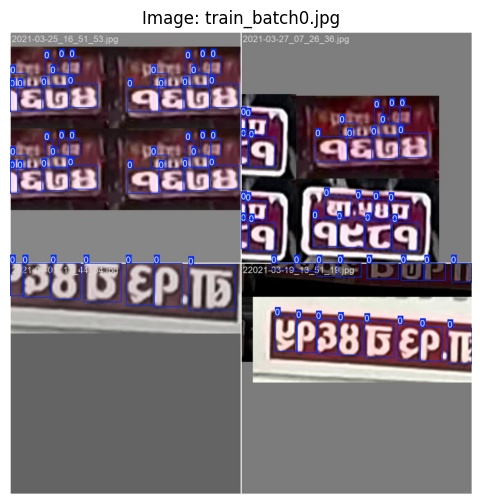

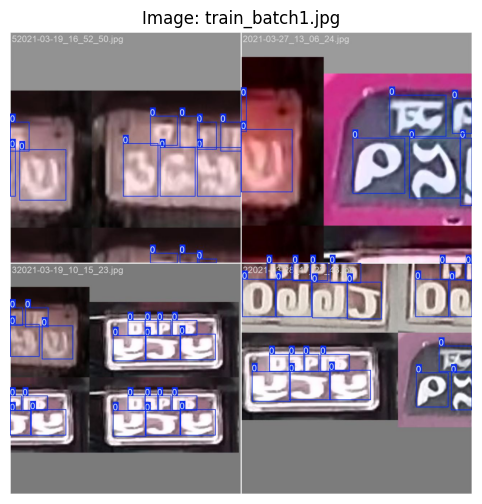

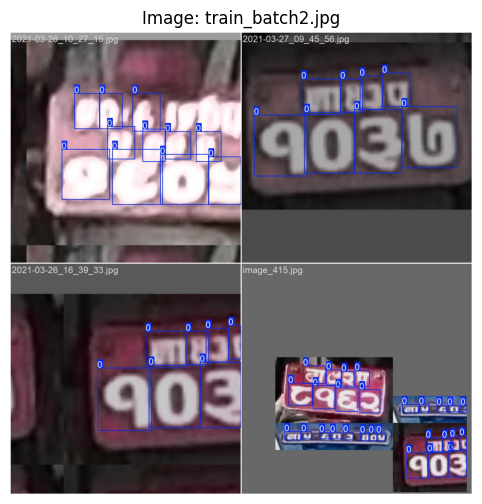

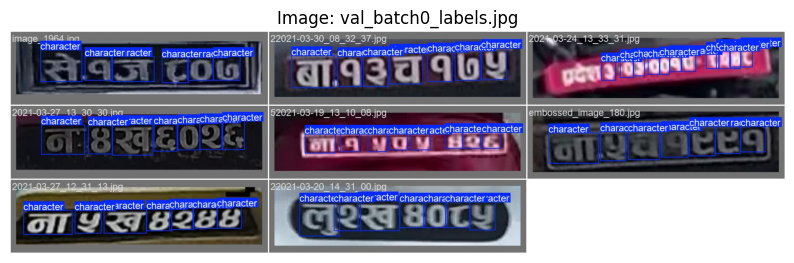

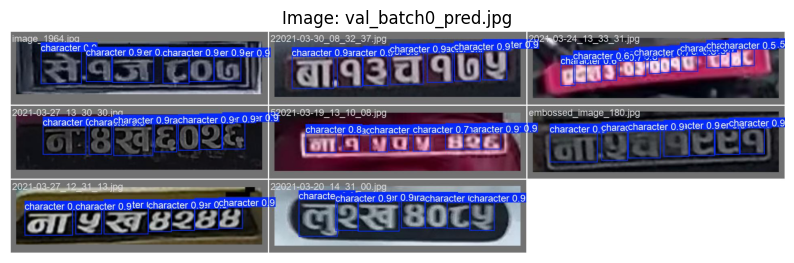

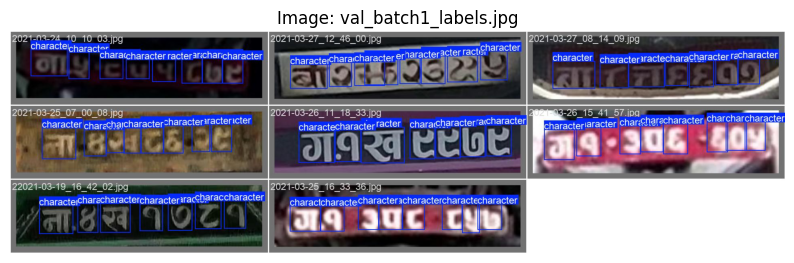

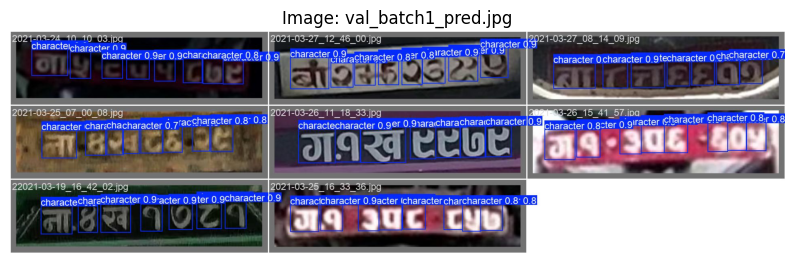

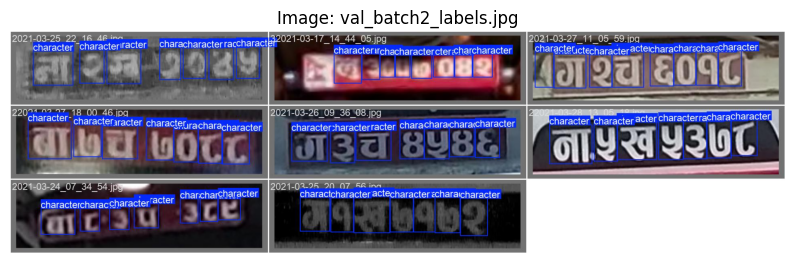

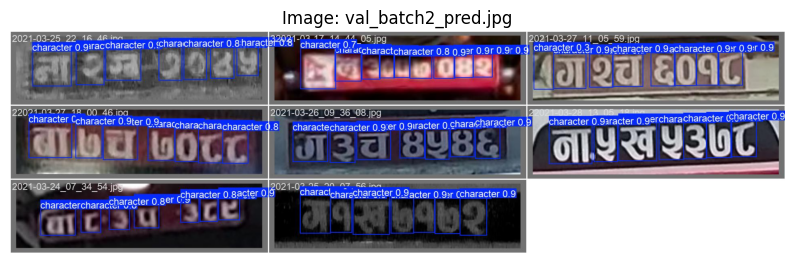

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Enable inline plotting
%matplotlib inline

tpaths2 = []
train_results_path = os.path.abspath('training_results')  # Use the absolute path dynamically

for dirname, _, filenames in os.walk(train_results_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg')):  # Check for both PNG and JPG files
            tpaths2.append(os.path.join(dirname, filename))

tpaths2 = sorted(tpaths2)
if tpaths2:
    for img_path in tpaths2:
        img = mpimg.imread(img_path)
        plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"Image: {os.path.basename(img_path)}")
        plt.show()
else:
    print("No PNG or JPG files found in the directory.")


    

In [16]:
import pandas as pd

# Use the best or last .pt model or results .csv
training_results_path = os.path.abspath('training_results/traific_sg_beta_v1')  # Use the absolute path dynamically

# Check for best.pt or last.pt
best_model_path = os.path.join(training_results_path, 'weights', 'best.pt')
last_model_path = os.path.join(training_results_path, 'weights', 'last.pt')

if os.path.exists(best_model_path):
    print(f"Best model found: {best_model_path}")
elif os.path.exists(last_model_path):
    print(f"Last model found: {last_model_path}")
else:
    print("No best.pt or last.pt model found.")

# Check for results.csv
results_csv_path = os.path.join(training_results_path, 'results.csv')

if os.path.exists(results_csv_path):
    print(f"Results CSV found: {results_csv_path}")
    # Optionally, read and display the results
    results_df = pd.read_csv(results_csv_path)
    print("Results CSV content:")
    print(results_df.head())
else:
    print("No results.csv file found.")

Best model found: F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\weights\best.pt
Results CSV found: F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\results.csv
Results CSV content:
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   74.9624         1.05506         1.02619         1.07049   
1      2  143.8380         0.90738         0.62669         1.00998   
2      3  212.6680         0.85995         0.55261         0.99869   
3      4  281.8030         0.80727         0.48766         0.98110   
4      5  351.6120         0.76284         0.44486         0.96602   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.95627            0.96175           0.98321   
1               0.96009            0.97040           0.99031   
2               0.97771            0.96066           0.99142   
3               0.97359            0.97079           0.99129   
4          

In [23]:

training_results_path = os.path.abspath('training_results/traific_sg_beta_v1/weights')

test_path = os.path.abspath('./data/test/images')  # Ensure the relative path starts with './'
print(f"Training results path: {training_results_path}")
print(f"Test path: {test_path}")


best_model_path = os.path.join(training_results_path, 'best.pt')

if os.path.exists(best_model_path):
    print(f"Best model found at: {best_model_path}")
else:
    print("best.pt file not found.")

Training results path: F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\weights
Test path: F:\development\python\ANPR\models\sg-traific\data\test\images
Best model found at: F:\development\python\ANPR\models\sg-traific\training_results\traific_sg_beta_v1\weights\best.pt


In [24]:
model2 = YOLO(best_model_path)
!yolo task=detect mode=predict model={best_model_path} conf=0.04 source={test_path}

Ultralytics 8.3.116  Python-3.10.17 torch-2.7.0+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_04_04_59.jpg: 224x640 8 characters, 37.1ms
image 2/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_14_40.jpg: 224x640 15 characters, 8.5ms
image 3/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_32_55.jpg: 320x640 10 characters, 27.3ms
image 4/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_35_53.jpg: 288x640 13 characters, 28.8ms
image 5/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_48_23.jpg: 448x640 11 characters, 31.3ms
image 6/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_09_06_15.jpg: 384x640 7 characters, 28.9ms
image 7/376 F:\development\python\ANPR\models\sg-traific\da

In [25]:
results = model2.predict(test_path,conf=0.04)
print(len(results))


image 1/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_04_04_59.jpg: 224x640 8 characters, 69.8ms
image 2/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_14_40.jpg: 224x640 15 characters, 11.8ms
image 3/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_32_55.jpg: 320x640 10 characters, 61.0ms
image 4/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_35_53.jpg: 288x640 13 characters, 39.4ms
image 5/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_07_48_23.jpg: 448x640 11 characters, 36.8ms
image 6/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_09_06_15.jpg: 384x640 7 characters, 36.3ms
image 7/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_09_50_07.jpg: 384x640 7 characters, 12.8ms
image 8/376 F:\development\python\ANPR\models\sg-traific\data\test\images\2021-03-23_09_56_23.jpg: 

In [27]:
import cv2
from ultralytics import YOLO
import urllib.request
import numpy as np

training_results_path = os.path.abspath('training_results/traific_sg_beta_v1/weights')

 

best_model_path = os.path.join(training_results_path, 'best.pt')

model_path = best_model_path
model = YOLO(model_path)

# Function to predict and display results
def predict_number_plate(image_url):
    """Predicts number plate in the given image URL and displays results."""
    try:
        # Download the image from the URL
        print('downloading')
        req = urllib.request.urlopen(image_url)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)  # 'Load it as it is'
        print('predicting')

        # Perform prediction
        results = model.predict(img)  # Pass the image to YOLOv8 for prediction

        annotated_image = results[0].plot()  # Get annotated image
        print('showing')

        # Display the image using cv2.imshow
        cv2.imshow("Annotated Image", annotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print(f"Error during prediction: {e}")

# Get image URL from user
image_url = input("Enter the URL of the number plate image: ")

# Perform prediction and display results
predict_number_plate('https://i.ibb.co/SQTcjrk/image.png')
# predict_number_plate(image_url)

Enter the URL of the number plate image:  https://i.ibb.co/SQTcjrk/image.png


downloading
predicting

0: 384x640 7 characters, 27.6ms
Speed: 8.3ms preprocess, 27.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
showing


In [28]:
# Get image URL from user
image_url = input("Enter the URL of the number plate image: ")

# Perform prediction and display results
predict_number_plate(image_url)

Enter the URL of the number plate image:  https://i.ibb.co/SQTcjrk/image.png


downloading
predicting

0: 384x640 7 characters, 9.8ms
Speed: 17.1ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
showing



0: 384x640 7 characters, 15.8ms
Speed: 9.6ms preprocess, 15.8ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'character'}
obb: None
orig_img: array([[[131, 126, 117],
        [134, 129, 120],
        [133, 128, 119],
        ...,
        [219, 210, 201],
        [226, 217, 208],
        [229, 218, 210]],

       [[132, 127, 118],
        [134, 129, 120],
        [135, 130, 121],
        ...,
        [183, 174, 165],
        [188, 179, 170],
        [192, 181, 173]],

       [[135, 130, 121],
        [135, 130, 121],
        [137, 132, 123],
        ...,
        [170, 163, 154],
        [177, 170, 161],
        [184, 175, 166]],

       ...,

       [[171, 140, 117],
        [174, 146, 122],
        [179, 151, 127],
        ...,
        [255, 230, 211],
        [255, 230, 211],
        [255, 230, 209]],

       [[215, 191

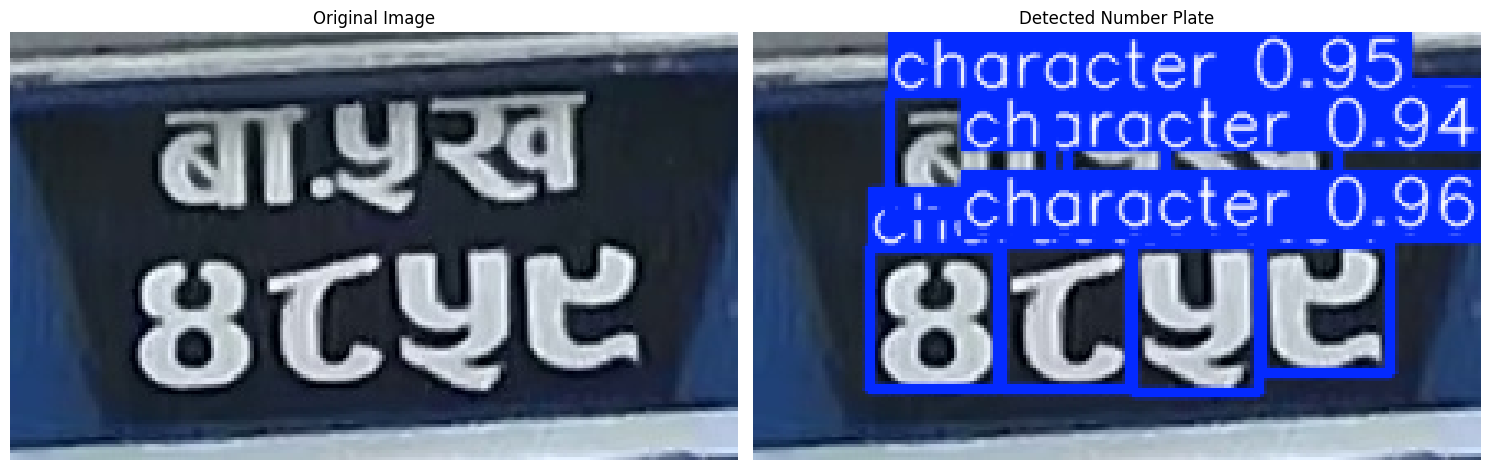

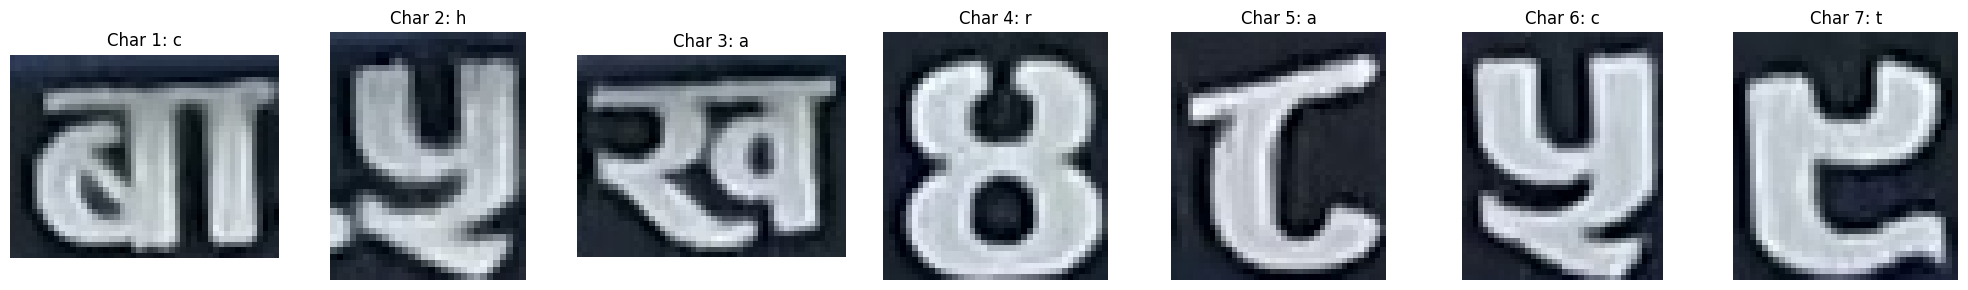


Final Sequence: charactercharactercharacter charactercharactercharactercharacter


In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib
from ultralytics import YOLO

# Load model
training_results_path = os.path.abspath('training_results/traific_sg_beta_v1/weights')
best_model_path = os.path.join(training_results_path, 'best.pt')
model = YOLO(best_model_path)

def display_images(images, titles=None, rows=1, cols=1, figsize=(15, 8)):
    """Display multiple images in a grid format."""
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def predict_number_plate_with_characters(image_url):
    try:
        # Download and process image
        req = urllib.request.urlopen(image_url)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)
        orig_img = img.copy()
        
        # Perform prediction
        results = model.predict(img)
        print(results)
        annotated_img = results[0].plot()
        
        # Get and process boxes
        boxes = results[0].boxes
        height_threshold = img.shape[0] * 0.1  # 10% of image height as line threshold
        
        # Create list of boxes with coordinates and class IDs
        box_data = []
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
            cls_id = int(box.cls)
            box_data.append({
                'coordinates': (x1, y1, x2, y2),
                'y_center': (y1 + y2) // 2,
                'cls_id': cls_id
            })
        
        # Group boxes into lines
        lines = []
        current_line = []
        last_y = None
        
        for box in sorted(box_data, key=lambda x: x['y_center']):
            if not current_line:
                current_line.append(box)
                last_y = box['y_center']
            else:
                if abs(box['y_center'] - last_y) < height_threshold:
                    current_line.append(box)
                else:
                    lines.append(sorted(current_line, key=lambda x: x['coordinates'][0]))
                    current_line = [box]
                    last_y = box['y_center']
        if current_line:
            lines.append(sorted(current_line, key=lambda x: x['coordinates'][0]))
        
        # Generate character sequence
        sequence = []
        char_images = []
        for line in lines:
            line_chars = []
            for box in line:
                # Get character from class ID
                char = model.names[box['cls_id']]
                line_chars.append(char)
                
                # Crop character image
                x1, y1, x2, y2 = box['coordinates']
                char_img = img[y1:y2, x1:x2]
                char_images.append(char_img)
            
            sequence.append(''.join(line_chars))
        
        final_sequence = ' '.join(sequence)
        
        # Display results
        # Original and annotated images
        display_images(
            [orig_img, annotated_img],
            ['Original Image', 'Detected Number Plate'],
            rows=1, cols=2, figsize=(15, 6)
        )
        
        # Display characters in sequence
        if char_images:
            titles = [f"Char {i+1}: {c}" for i, c in enumerate(final_sequence.replace(' ', ''))]
            display_images(
                char_images,
                titles,
                rows=1, cols=len(char_images),
                figsize=(20, 3)
            )
            print("\nFinal Sequence:", final_sequence)
        
    except Exception as e:
        print(f"Error: {e}")

# Example usage
image_url = 'https://i.ibb.co/SQTcjrk/image.png'
predict_number_plate_with_characters(image_url)